In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [16]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

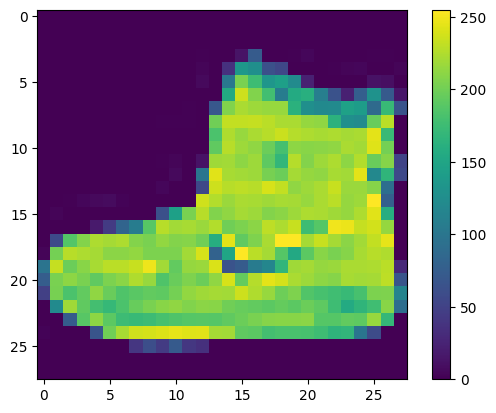

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [17]:
train_images_rnn = train_images / 255.0

test_images_rnn = test_images / 255.0

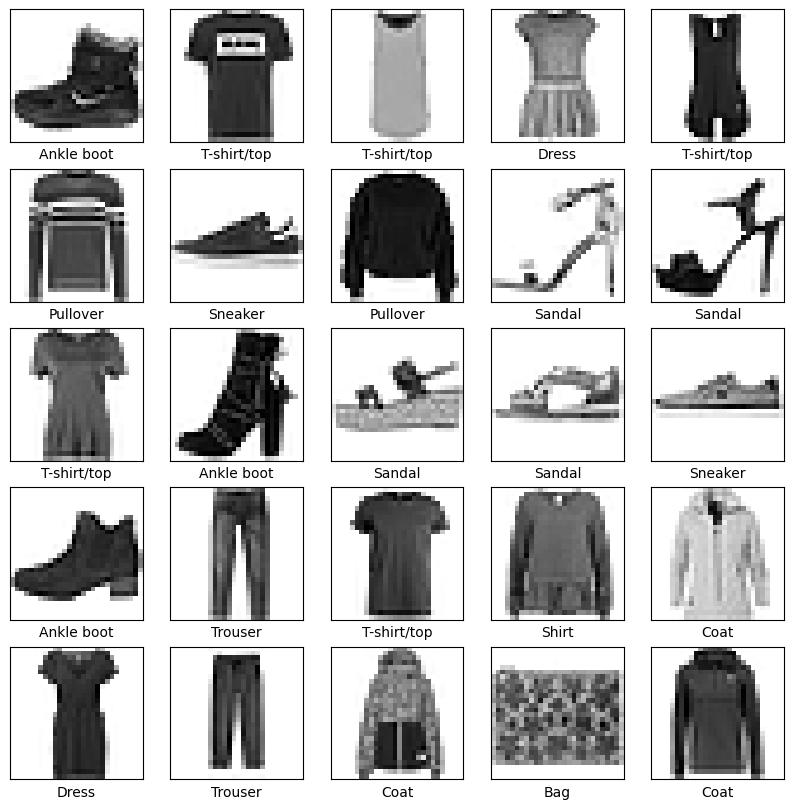

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_rnn[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**Creating ANN Model**

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [10]:
model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [19]:
model.fit(train_images_rnn, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2292 - accuracy: 0.9136
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2213 - accuracy: 0.9169
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2163 - accuracy: 0.9191
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2093 - accuracy: 0.9211
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2019 - accuracy: 0.9245
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1957 - accuracy: 0.9271
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1945 - accuracy: 0.9273
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1857 - accuracy: 0.9313
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1833 - accuracy: 0.9307
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.17

In [20]:
test_loss, test_acc = model.evaluate(test_images_rnn,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3645 - accuracy: 0.8860 - 543ms/epoch - 2ms/step

Test accuracy: 0.8859999775886536


Create CNN Model

In [15]:
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3),padding='same',activation='relu',input_shape=(28,28,1), data_format='channels_last'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model_cnn.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [21]:
# Reshape the images for CNN
train_images_cnn = train_images.reshape((-1, 28, 28, 1))
test_images_cnn = test_images.reshape((-1, 28, 28, 1))


In [23]:
model_cnn.fit(train_images_cnn, train_labels, epochs=10, validation_data=(test_images_cnn, test_labels))

Epoch 1/10
1875/1875 [==============================] - 89s 46ms/step - loss: 0.5316 - accuracy: 0.8494 - val_loss: 0.3500 - val_accuracy: 0.8709
Epoch 2/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.2927 - accuracy: 0.8909 - val_loss: 0.3129 - val_accuracy: 0.8865
Epoch 3/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.2542 - accuracy: 0.9033 - val_loss: 0.2991 - val_accuracy: 0.8948
Epoch 4/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.2243 - accuracy: 0.9161 - val_loss: 0.2911 - val_accuracy: 0.8961
Epoch 5/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.2052 - accuracy: 0.9223 - val_loss: 0.2951 - val_accuracy: 0.9057
Epoch 6/10
1875/1875 [==============================] - 85s 46ms/step - loss: 0.1880 - accuracy: 0.9299 - val_loss: 0.2818 - val_accuracy: 0.9103
Epoch 7/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.1694 - accuracy: 0.9359 - val_loss: 0.3390 -

In [24]:
def plot_learning_curves(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss vs. Epochs')
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy vs. Epochs')
    plt.show()

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1735 - accuracy: 0.9350 - val_loss: 0.3741 - val_accuracy: 0.8820
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1691 - accuracy: 0.9372 - val_loss: 0.3522 - val_accuracy: 0.8932
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1642 - accuracy: 0.9386 - val_loss: 0.3629 - val_accuracy: 0.8900
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1611 - accuracy: 0.9398 - val_loss: 0.3768 - val_accuracy: 0.8888
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1551 - accuracy: 0.9416 - val_loss: 0.3776 - val_accuracy: 0.8890
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1538 - accuracy: 0.9432 - val_loss: 0.3986 - val_accuracy: 0.8884
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1494 - accuracy: 0.9444 - val_loss: 0.4143 - val_accuracy

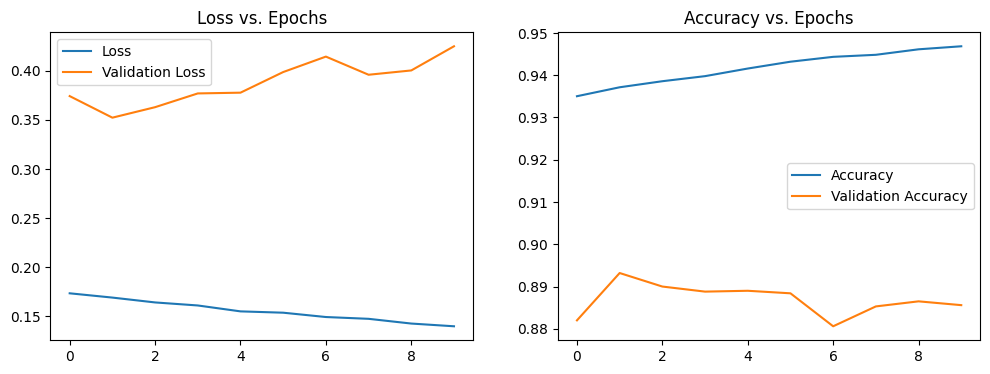

In [26]:
plot_learning_curves( model.fit(train_images_rnn, train_labels, epochs=10, validation_data=(test_images_rnn, test_labels)))

The above graph shows for ANN Model

Epoch 1/10
1875/1875 [==============================] - 85s 45ms/step - loss: 0.1204 - accuracy: 0.9549 - val_loss: 0.3808 - val_accuracy: 0.9056
Epoch 2/10
1875/1875 [==============================] - 87s 46ms/step - loss: 0.1193 - accuracy: 0.9567 - val_loss: 0.4411 - val_accuracy: 0.9001
Epoch 3/10
1875/1875 [==============================] - 82s 43ms/step - loss: 0.1097 - accuracy: 0.9594 - val_loss: 0.4739 - val_accuracy: 0.9039
Epoch 4/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.1045 - accuracy: 0.9623 - val_loss: 0.4506 - val_accuracy: 0.9081
Epoch 5/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0920 - accuracy: 0.9674 - val_loss: 0.4653 - val_accuracy: 0.9032
Epoch 6/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0957 - accuracy: 0.9662 - val_loss: 0.5120 - val_accuracy: 0.9057
Epoch 7/10
1875/1875 [==============================] - 89s 48ms/step - loss: 0.0806 - accuracy: 0.9709 - val_loss: 0.5652 -

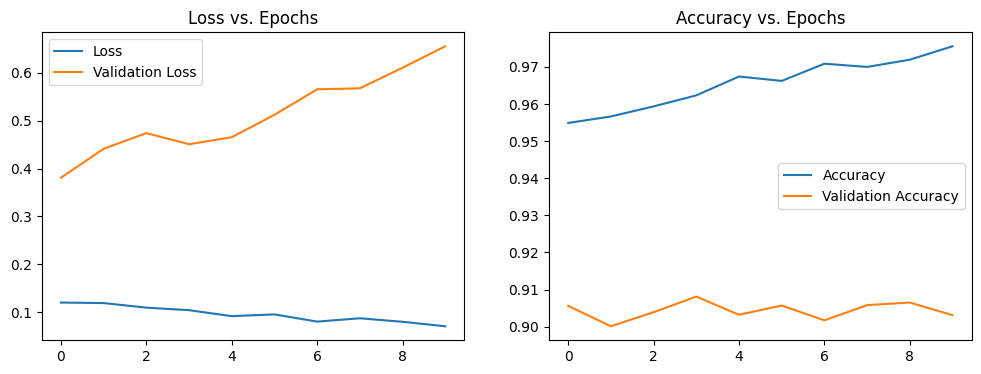

In [28]:
plot_learning_curves( model_cnn.fit(train_images_cnn, train_labels, epochs=10, validation_data=(test_images_cnn, test_labels)))

CNN for different settings

filter = 8,16 and kernel_size=(1,1)

In [33]:
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3),padding='same',activation='relu',input_shape=(28,28,1), data_format='channels_last'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model_cnn.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
model_cnn.fit(train_images_cnn, train_labels, epochs=10, validation_data=(test_images_cnn, test_labels))

Epoch 1/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.8196 - accuracy: 0.8183 - val_loss: 0.4100 - val_accuracy: 0.8485
Epoch 2/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.3266 - accuracy: 0.8806 - val_loss: 0.3400 - val_accuracy: 0.8789
Epoch 3/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.2861 - accuracy: 0.8938 - val_loss: 0.3350 - val_accuracy: 0.8793
Epoch 4/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2626 - accuracy: 0.9029 - val_loss: 0.3238 - val_accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.2392 - accuracy: 0.9098 - val_loss: 0.3265 - val_accuracy: 0.8854
Epoch 6/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.2191 - accuracy: 0.9175 - val_loss: 0.3387 - val_accuracy: 0.8931
Epoch 7/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2044 - accuracy: 0.9229 - val_loss: 0.3060 -

filter = 8,16 and kernel_size=(2,2)

In [34]:
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3),padding='same',activation='relu',input_shape=(28,28,1), data_format='channels_last'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model_cnn.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
model_cnn.fit(train_images_cnn, train_labels, epochs=10, validation_data=(test_images_cnn, test_labels))

Epoch 1/10
1875/1875 [==============================] - 34s 17ms/step - loss: 0.7454 - accuracy: 0.8035 - val_loss: 0.4447 - val_accuracy: 0.8402
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3734 - accuracy: 0.8648 - val_loss: 0.3888 - val_accuracy: 0.8614
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.3207 - accuracy: 0.8813 - val_loss: 0.3559 - val_accuracy: 0.8700
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2878 - accuracy: 0.8945 - val_loss: 0.3416 - val_accuracy: 0.8752
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2611 - accuracy: 0.9019 - val_loss: 0.3469 - val_accuracy: 0.8739
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2400 - accuracy: 0.9106 - val_loss: 0.3493 - val_accuracy: 0.8758
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2212 - accuracy: 0.9155 - val_loss: 0.3422 -